In [1]:
# Python 3 environment 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.classify import SklearnClassifier
%matplotlib inline



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


# Removing upper-case letters, performing stemming, and utilizing stopwords. 

In [3]:
corpus = []
for i in range(0, 20491):
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [4]:
print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Incorporating bag-of-words

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

# Performing train-test split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

# Training the model using MultinomialNB

In [7]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

<AxesSubplot:xlabel='Rating', ylabel='count'>

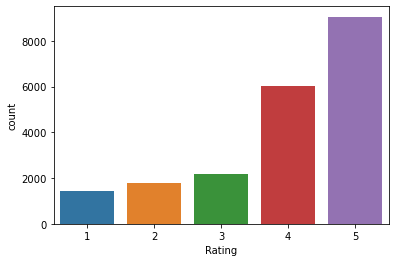

In [8]:
sns.countplot(x= df['Rating'])



# Predicting test set results with Numpy

In [9]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [3 2]
 [5 4]
 ...
 [5 5]
 [4 4]
 [4 5]]


# Analyzing accuracy with Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[109  25  10   5   3]
 [ 47  57  27  20   6]
 [ 13  38  66  76  24]
 [  4  34  68 249 251]
 [  2  19  19 150 728]]


0.5897560975609756

# **Sentiment Analysis**

In [11]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kip\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Generating Sentiment Scores using Vader Sentiment Analyzer**
Valence score is a score assigned to the word under consideration by means of observation and experiences rather than pure logic. Vader sentiment recognizes more popular social media parlance than TextBlob and other libraries. 

It is measured on a scale from -4 to +4, where -4 stands for the most ‘Negative’ sentiment and +4 for the most ‘Positive’ sentiment. Zero will be recognized as neutral. 

In [12]:
df['scores'] = df['Review'].apply(lambda hotel_overview: sid.polarity_scores(str(hotel_overview)))
df

,Review,Rating,scores
0,nice hotel expensive parking got good deal sta...,4,"{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co..."
1,ok nothing special charge diamond member hilto...,2,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com..."
2,nice rooms not 4* experience hotel monaco seat...,3,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp..."
3,"unique, great stay, wonderful time hotel monac...",5,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com..."
4,"great stay great stay, went seahawk game aweso...",5,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co..."
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,"{'neg': 0.063, 'neu': 0.665, 'pos': 0.272, 'co..."
20487,great location price view hotel great quick pl...,4,"{'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compou..."
20488,"ok just looks nice modern outside, desk staff ...",2,"{'neg': 0.131, 'neu': 0.724, 'pos': 0.145, 'co..."
20489,hotel theft ruined vacation hotel opened sept ...,1,"{'neg': 0.15, 'neu': 0.671, 'pos': 0.179, 'com..."


Adding "sentiment_type" and using "scores" data to assign the type.
Notice user Rating may not agree with their sentiment. 

In [13]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'
df

,Review,Rating,scores,compound,sentiment_type
0,nice hotel expensive parking got good deal sta...,4,"{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co...",0.9747,POSITIVE
1,ok nothing special charge diamond member hilto...,2,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com...",0.9787,POSITIVE
2,nice rooms not 4* experience hotel monaco seat...,3,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp...",0.9889,POSITIVE
3,"unique, great stay, wonderful time hotel monac...",5,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com...",0.9912,POSITIVE
4,"great stay great stay, went seahawk game aweso...",5,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co...",0.9797,POSITIVE
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,"{'neg': 0.063, 'neu': 0.665, 'pos': 0.272, 'co...",0.9834,POSITIVE
20487,great location price view hotel great quick pl...,4,"{'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compou...",0.9753,POSITIVE
20488,"ok just looks nice modern outside, desk staff ...",2,"{'neg': 0.131, 'neu': 0.724, 'pos': 0.145, 'co...",0.2629,POSITIVE
20489,hotel theft ruined vacation hotel opened sept ...,1,"{'neg': 0.15, 'neu': 0.671, 'pos': 0.179, 'com...",0.9867,POSITIVE


<AxesSubplot:title={'center':'sentiment analysis'}>

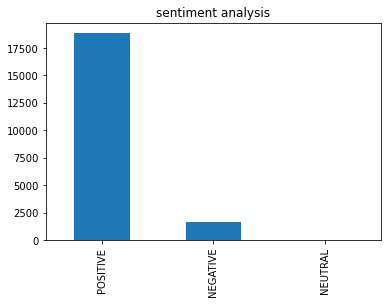

In [14]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

Deleting "scores" column as it is no longer useful.

In [15]:
data = df[['Review','sentiment_type','compound', 'Rating']]
data

,Review,sentiment_type,compound,Rating
0,nice hotel expensive parking got good deal sta...,POSITIVE,0.9747,4
1,ok nothing special charge diamond member hilto...,POSITIVE,0.9787,2
2,nice rooms not 4* experience hotel monaco seat...,POSITIVE,0.9889,3
3,"unique, great stay, wonderful time hotel monac...",POSITIVE,0.9912,5
4,"great stay great stay, went seahawk game aweso...",POSITIVE,0.9797,5
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",POSITIVE,0.9834,5
20487,great location price view hotel great quick pl...,POSITIVE,0.9753,4
20488,"ok just looks nice modern outside, desk staff ...",POSITIVE,0.2629,2
20489,hotel theft ruined vacation hotel opened sept ...,POSITIVE,0.9867,1


# Plotting trend of overall sentiment

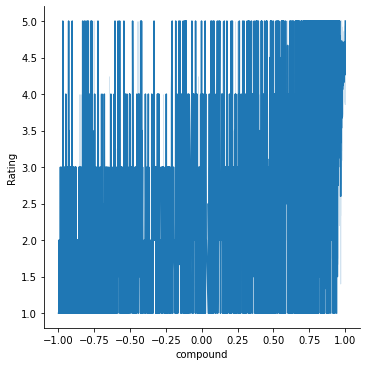

In [16]:
sns.relplot(x="compound", y="Rating", kind="line", data=data)



In [17]:
corpus[0:800]

['nice hotel expens park got good deal stay hotel anniversari arriv late even took advic previou review valet park check quick easi littl disappoint non exist view room room clean nice size bed comfort woke stiff neck high pillow soundproof like heard music room night morn loud bang door open close hear peopl talk hallway mayb noisi neighbor aveda bath product nice goldfish stay nice touch taken advantag stay longer locat great walk distanc shop overal nice experi pay park night',
 'ok noth special charg diamond member hilton decid chain shot th anniversari seattl start book suit paid extra websit descript suit bedroom bathroom standard hotel room took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast got kid embassi suit sit room bathroom bedroom unlik kimpton call suit day stay offer correct fals advertis send kimpton prefer guest websit email ask failur provid suit advertis websit reserv descript furnish hard